**This Assignment is submitted by Mohit Kumar Rathod (MT22041)**

**1. (40 points) Image Classification**

1. (5 points) Refer to the SVHN Dataset (Format 2).

(a) (1 point) Download train 32x32.mat. Use 20% of the training dataset for validation and 10% for testing. Initialize Weights & Biases (WandB)(Video Tutorial).

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install wandb --upgrade
import wandb

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 21.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.3/184.3 KB 12.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 181.3/181.3 KB 11.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 KB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 140.6/140.6 KB 10.2 MB/s eta 0:00:00
  Created wheel for pathtools: filename=pathtools-0.1.2-py3-none-any.whl size=8806 sha256=cb93d4e8ea272c579557370473e35648eb75c7db874196f6b8b9cb27ffe0516f
  Stored in directory: /root/.cache/pip/wheels/4c/8e/7e/72fbc243e1aeecae64a96875432e70d4e92f3d2d18123be004
Successfully built pathtools
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3


In [ ]:
import numpy as np
import scipy.io
import pandas as pd
from scipy.io import loadmat
from torch.utils.data import random_split
import matplotlib.pyplot as plt
import torchvision
import torchvision.transforms as transforms
from tqdm import tqdm, tqdm_notebook

In [ ]:
import torch
torch.cuda.is_available()

True

In [ ]:
import torch
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
from torchvision import transforms

import matplotlib.pyplot as plt
import os
from PIL import Image

In [ ]:
class SVHNDataset(Dataset):
    """Custom Dataset for loading cropped SVHN images"""
    
    def __init__(self, transform=None):
    
        data = loadmat('/content/drive/MyDrive/train_32x32.mat')
        self.img_names = data['X'].T
        self.y = data['y']
        self.transform = transform

        for i in range(len(self.y)):
          if self.y[i]==10:
            self.y[i]=0

    def __getitem__(self, index):

        img = self.img_names[index]
        label = self.y[index]
        return img, label

    def __len__(self):

        return self.y.shape[0]

In [ ]:
custom_transform = transforms.Compose([transforms.ToTensor()])

dataset = SVHNDataset(transform=custom_transform)

train_dataset, valid_dataset, test_dataset = random_split(dataset, [0.7, 0.2, 0.1])

train_loader = DataLoader(train_dataset, batch_size=64)
test_loader = DataLoader(test_dataset, batch_size=64)
valid_loader = DataLoader(valid_dataset, batch_size=64)

In [ ]:
wandb.login()

<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit: 

··········


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


True

In [ ]:
dataiter = iter(train_loader)
data = next(dataiter)
features, labels = data
print(features, labels)

tensor([[[[ 77,  63,  45,  ...,  55,  75,  99],
          [ 84,  69,  49,  ...,  59,  83, 106],
          [ 86,  68,  47,  ...,  63,  87, 108],
          ...,
          [104, 106, 110,  ...,  94,  97, 100],
          [102, 101, 101,  ...,  81,  84,  87],
          [ 99,  93,  89,  ...,  58,  61,  66]],

         [[ 75,  59,  41,  ...,  64,  84, 106],
          [ 82,  67,  48,  ...,  68,  89, 111],
          [ 84,  66,  46,  ...,  73,  94, 113],
          ...,
          [101, 103, 107,  ...,  93,  95, 100],
          [101, 100,  97,  ...,  79,  82,  87],
          [ 98,  92,  85,  ...,  56,  61,  66]],

         [[ 76,  60,  42,  ...,  61,  79,  99],
          [ 83,  68,  46,  ...,  65,  85, 105],
          [ 85,  67,  45,  ...,  70,  87, 106],
          ...,
          [ 96,  98, 102,  ...,  92,  94,  98],
          [ 97,  96,  95,  ...,  80,  83,  87],
          [ 94,  88,  82,  ...,  61,  63,  68]]],


        [[[166, 166, 159,  ..., 161, 162, 168],
          [164, 163, 158,  ..., 135

In [ ]:
def make_plot(load):
  label = []
  for data in load:
        label.append(data[1])
  
  label = np.array(label)
  label, values = np.unique(label,return_counts=True)
  plt.xlabel("Label")
  plt.ylabel("Count")
  plt.bar(label,values)

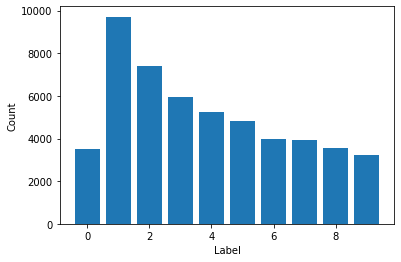

In [ ]:
make_plot(train_dataset)

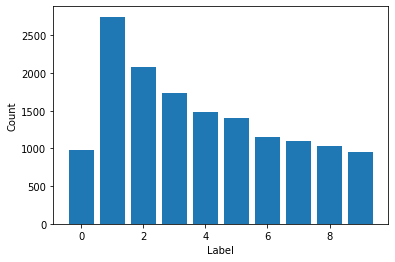

In [ ]:
make_plot(valid_dataset)

**2. (10 points) Training a CNN from scratch (Tutorial):**

(a) (3 points) Create a CNN architecture with 2 Convolution Layers having a kernel
size of 3×3 and padding of 1. Use 32 feature maps for the first layer and 64
for the second. Finally add classification head to the conv layers. Use ReLU
activation functions wherever applicable.

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

In [ ]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        
        # Input is a RGB image of size 32*32, therefore input has 3 channels, size of input = 32*32*3
        # We need to implement 32 feature maps, therefore output channel has a size of 32*32*32
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=32, kernel_size=(3,3), padding=(1,1), stride=(1,1))
        
        
        # Input to second convolutional layer a RGB image of size 32*32*32
        # We need to implement 64 feature maps, therefore output channel has a size of 64*32*32
        self.conv2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=(3,3), padding=(1,1), stride=(1,1))
        
        
        self.fc1 = nn.Linear(64*32*32, 64*32)
        self.fc2 = nn.Linear(64*32, 64)
        self.fc3 = nn.Linear(64, 10)

    def forward(self, x):
        x = self.conv1(x)
        x = self.conv2(x)
        x = x.reshape(x.shape[0], -1)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        
        return x

In [ ]:
gpu = "cuda:0" if torch.cuda.is_available() else "cpu"

In [ ]:
model = Net().to(gpu)

In [ ]:
import torch.optim as optim
 
lr = 0.01
epochs = 8
batch_size = 64
criterion = nn.CrossEntropyLoss().to(gpu)
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.8)

In [ ]:
wandb.init(entity="mohiteam", project="CV_A1_Q1")
wandb.config = {"learning_rate": lr , "epochs": epochs, "batch_size": batch_size}

wandb: Currently logged in as: mohit22041 (mohiteam). Use `wandb login --relogin` to force relogin


In [ ]:
len(train_loader)

802

In [ ]:
for epoch in range(epochs):  # loop over the dataset multiple times

    running_loss=0.0
    for i, data in enumerate(train_loader, 0):
        # get the inputs; data is a list of [inputs, labels]
        
        inp, lab = data
        inp = inp/255
        lab = lab.flatten()
        inp = inp.to(gpu)
        lab = lab.to(gpu)

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = model(inp)
        
        loss = criterion(outputs, lab)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()

        

    valid_loss = 0.0
    model.eval()
    for i, data in enumerate(valid_loader, 0):
        # get the inputs; data is a list of [inputs, labels]
        
        inp, lab = data
        inp = inp/255
        lab = lab.flatten()
        inp = inp.to(gpu)
        lab = lab.to(gpu)

        outputs = model(inp)
        loss = criterion(outputs, lab)
        valid_loss+=loss.item()

    wandb.log(
          {"Train_loss":running_loss, "Val_loss": valid_loss}
          )

    print(f'Epoch {epoch+1} \t\t Training Loss: {running_loss / len(train_loader)} \t\t Validation Loss: {valid_loss / len(valid_loader)}')

print('Finished Training')

Epoch 1 		 Training Loss: 1.0575492411777563 		 Validation Loss: 0.8327227780131794
Epoch 2 		 Training Loss: 0.7069679795952509 		 Validation Loss: 0.6917763349791282
Epoch 3 		 Training Loss: 0.5490189017983446 		 Validation Loss: 0.6210126170164633
Epoch 4 		 Training Loss: 0.44187237983778527 		 Validation Loss: 0.6058712566523573
Epoch 5 		 Training Loss: 0.36380995319519854 		 Validation Loss: 0.6216373458569747
Epoch 6 		 Training Loss: 0.2988380881634882 		 Validation Loss: 0.6619443491947182
Epoch 7 		 Training Loss: 0.25020501594479544 		 Validation Loss: 0.7074925108898155
Epoch 8 		 Training Loss: 0.22706430570972605 		 Validation Loss: 0.748392128267663
Finished Training


In [ ]:
torch.save(model.state_dict(),"/content/drive/MyDrive/CV_A1_Q1/model_cnn.mat")
artifact = wandb.Artifact('model', type='model')
artifact.add_file('/content/drive/MyDrive/CV_A1_Q1/model_cnn.mat')
wandb.log_artifact(artifact)

In [ ]:
model = Net().to(gpu)
model.load_state_dict(torch.load('/content/drive/MyDrive/CV_A1_Q1/model_cnn.mat'))

<All keys matched successfully>

(c) (3 points) Report the Accuracy and F1-Score on the test set. Also, log the
confusion matrix using wandb.

In [ ]:
true = []
pred = []
true1 = []
pred1 = []


correct = 0
total = 0
total1 = 0
correct1 = 0
# since we're not training, we don't need to calculate the gradients for our outputs
with torch.no_grad():
    for data in test_loader:
        images, labels = data
        images = images/255
        images = images.to(gpu)
        labels = labels.to(gpu)
        # calculate outputs by running images through the network
        outputs = model(images)
        # the class with the highest energy is what we choose as prediction
        _, predicted = torch.max(outputs.data, 1)

        labels = labels.flatten()

        true1.append(labels)
        pred1.append(predicted)

        #print(labels, predicted)
        for i in range(64):
          if len(predicted)==64:
            true.append(labels[i])
            pred.append(predicted[i])


        for i in range(64):
          total+=1
          if len(predicted)==64:
            if predicted[i]==labels[i]:
              correct+=1

print(f'Accuracy of the network on the test images: {100 * correct // total} %')
wandb.log=({"accuracy":100 * correct // total})

Accuracy of the network on the test images: 83 %


In [ ]:
wandb.finish()

Train_loss,█▅▄▃▂▂▁▁
Val_loss,█▄▁▁▁▃▄▅
Train_loss,182.10557
Val_loss,171.3818


In [ ]:
!pip install torchmetrics
from torchmetrics.classification import F1Score,ConfusionMatrix
f1score = F1Score(task="multiclass",num_classes=10).to(gpu)
f1_score = f1score(torch.tensor(true1).to(dtype=torch.int,device=gpu), torch.tensor(pred1).to(dtype=torch.int,device=gpu))

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 517.2/517.2 KB 9.3 MB/s eta 0:00:00


TypeError: ignored

(d) [PG] (3.5 points) For each class in the test set, visualize any 3 images that
were misclassified along with the predicted class label. Analyze why the model
could possibly be failing in these cases. Is this due to the fact that image looks
much similar to the predicted class than the actual ground truth or something
else?


<ipython-input-27-276309156c1d>:39: UserWarning: The use of `x.T` on tensors of dimension other than 2 to reverse their shape is deprecated and it will throw an error in a future release. Consider `x.mT` to transpose batches of matrices or `x.permute(*torch.arange(x.ndim - 1, -1, -1))` to reverse the dimensions of a tensor. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3277.)
  plt.imshow(classes[i][j].T.cpu())


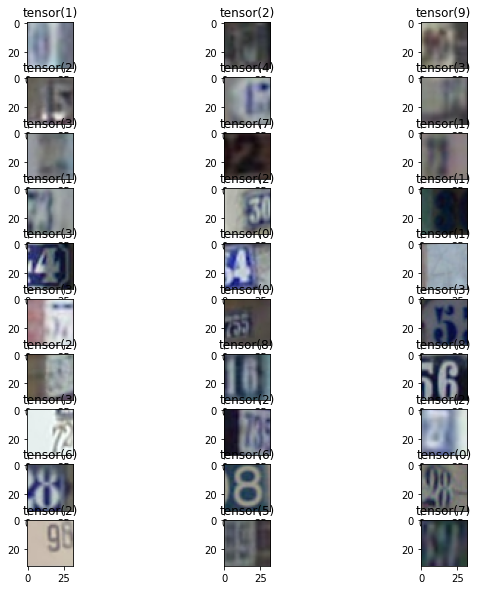

In [ ]:
classes = [[] for i in range(10)]
pred_labels = [[] for i in range(10)]


with torch.no_grad():

    for data in test_loader:

        images, labels = data
        images = images/255
        images = images.cuda()
        labels = labels.cuda()
        # calculate outputs by running images through the network
        outputs = model(images)
        # the class with the highest energy is what we choose as prediction
        _, predicted = torch.max(outputs.data, 1)

        labels = labels.flatten()


        for i in range(len(predicted)):

          if labels[i]!=predicted[i]:

            if len(classes[labels[i]])<3:

              classes[labels[i]].append(images[i])
              pred_labels[labels[i]].append(predicted[i])




fig = plt.figure(figsize=(10, 10))

for i in range(len(classes)):
    for j in range(3):

        fig.add_subplot(10, 3, 3*i+j+1)
        plt.imshow(classes[i][j].T.cpu())
        plt.title(pred_labels[i][j].cpu())

Our model fails in this case because the original image is similar to that of predicted image. for example consider the image of numbers 7 and 1. In both of them, if the upper bar of 7 is small, then the image would look like 1. Similarly, for 8 and 9, there is a very small gap between 8 and 9, and so on

**3. (10 points) Fine-tuning a pretrained model**

(a) (4 points) Train another classification model with a fine-tuned Resnet-18 (pretrained on ImageNet) architecture using the same strategy used in Question
1.2.(b) and again use wandb for logging the loss and accuracy.


In [ ]:
net = torchvision.models.resnet18(pretrained=True)

/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


  0%|          | 0.00/44.7M [00:00<?, ?B/s]

In [ ]:
model_ft = net
num_ftrs = model_ft.fc.in_features
model_ft.fc = nn.Linear(num_ftrs, 10)

In [ ]:
resnet_18 = model_ft

In [ ]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

# Assuming that we are on a CUDA machine, this should print a CUDA device:

print(device)

cuda:0


In [ ]:
resnet_18.to(device)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [ ]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss().to(device)
optimizer = optim.SGD(net.parameters(), lr=0.01, momentum=0.8)

In [ ]:
wandb.init()

In [ ]:
for epoch in range(epochs):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        # get the inputs; data is a list of [inputs, labels]
        
        inp, lab = data
        inp = inp/255
        lab = lab.flatten()
        inp = inp.to(device)
        lab = lab.to(device)

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = resnet_18(inp)
        
        loss = criterion(outputs, lab)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        

    valid_loss = 0.0
    resnet_18.eval()
    for i, data in enumerate(valid_loader, 0):
        # get the inputs; data is a list of [inputs, labels]
        
        inp, lab = data
        inp = inp/255
        lab = lab.flatten()
        inp = inp.to(device)
        lab = lab.to(device)

        outputs = resnet_18(inp)
        loss = criterion(outputs, lab)
        valid_loss+=loss.item()

    wandb.log(
          {"Train_loss_resnet":running_loss, "Val_loss_resnet": valid_loss}
          )


    print(f'Epoch {epoch+1} \t\t Training Loss: {running_loss / len(train_loader)} \t\t Validation Loss: {valid_loss / len(valid_loader)}')


print('Finished Training')

Epoch 1 		 Training Loss: 0.14360564904278167 		 Validation Loss: 0.3151119636314795
Epoch 2 		 Training Loss: 0.12805533183313572 		 Validation Loss: 0.3731259596595077
Epoch 3 		 Training Loss: 0.11310910366381521 		 Validation Loss: 0.3715443434315738
Epoch 4 		 Training Loss: 0.10148982940348529 		 Validation Loss: 0.3787212103572735
Epoch 5 		 Training Loss: 0.095124041412532 		 Validation Loss: 0.39958230843645515
Epoch 6 		 Training Loss: 0.08837071404399865 		 Validation Loss: 0.35973824881928196
Epoch 7 		 Training Loss: 0.08090841220116982 		 Validation Loss: 0.3863984598212888
Epoch 8 		 Training Loss: 0.07290164217224548 		 Validation Loss: 0.4586452127934543
Finished Training


In [ ]:
torch.save(resnet_18.state_dict(),"/content/drive/MyDrive/CV_A1_Q1/model_resnet18.mat")
artifact = wandb.Artifact('resnet_18', type='model')
artifact.add_file('/content/drive/MyDrive/CV_A1_Q1/model_resnet18.mat')
wandb.log_artifact(artifact)

In [ ]:
net = torchvision.models.resnet18(pretrained=True)
model_ft = net
num_ftrs = model_ft.fc.in_features
model_ft.fc = nn.Linear(num_ftrs, 10)
resnet_18 = model_ft.to(device)
resnet_18.load_state_dict(torch.load('/content/drive/MyDrive/CV_A1_Q1/model_resnet18.mat'))

/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


<All keys matched successfully>

(b) (3 points) Report the Accuracy and F1-Score on the test set. Also, log the
confusion matrix using wandb.


In [ ]:
true = []
pred = []
true1 = []
pred1 = []


correct = 0
total = 0
total1 = 0
correct1 = 0
# since we're not training, we don't need to calculate the gradients for our outputs
with torch.no_grad():
    for data in test_loader:
        images, labels = data
        images = images/255
        images = images.to(device)
        labels = labels.to(device)
        # calculate outputs by running images through the network
        outputs = resnet_18(images)
        # the class with the highest energy is what we choose as prediction
        _, predicted = torch.max(outputs.data, 1)

        labels = labels.flatten()

        true1.append(labels)
        pred1.append(outputs)

        #print(labels, predicted)
        for i in range(64):
          if len(predicted)==64:
            true.append(labels[i])
            pred.append(predicted[i])


        for i in range(64):
          total+=1
          if len(predicted)==64:
            if predicted[i]==labels[i]:
              correct+=1


print(f'Accuracy of the network on the test images: {100 * correct // total} %')
wandb.log=({"accuracy_resnet":100 * correct // total})

Accuracy of the network on the test images: 88 %


In [ ]:
f1score = F1Score(task="multiclass",num_classes=10)
f1_score = f1score(torch.tensor(true1), torch.tensor(pred1))

TypeError: only integer tensors of a single element can be converted to an index

(c) (3 points) For deep neural networks, typically, the backbone is the part of a model (initial layers) that is used to extract feature representations (or simply features) from the raw input data, which can then used for classification or some other related task. These features are expressed as an n-dimensional vector, also known as a feature vector and the corresponding vector space is referred to as the feature space. As the training progresses and the classifier learns to classify the input, the data samples belonging to the same class lie closer to each other in the feature space than other data samples. For input samples from the training and validation sets, extract the feature vectors using the backbone (ResNet-18 in this case) and visualize them in the feature space using the tSNE plot in a 2-D Space. Also, visualize the tSNE plot of the validation set in a 3D-Space.

In [ ]:
import torch
import torch.nn as nn
import torchvision.models as models
import torchvision.transforms as transforms
from torch.autograd import Variable

In [ ]:
net = torchvision.models.resnet18(pretrained=True)
model_ft = net
num_ftrs = model_ft.fc.in_features
model_ft.fc = nn.Linear(num_ftrs, 10)
resnet_18 = model_ft.to(device)

/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [ ]:
def extract_features(model, dataloader):

  resnet_18.eval()
  resnet_18 = resnet_18.to(device)

  with torch.no_grad():
    features = None
    for i, data in enumerate(train_loader, 0):
      images, labels = data
      images = images/255
      images = images.to(device)
      labels = labels.to(device)

      output = resnet_18(images)

      if features is not None:
        features = torch.cat((features, output), 0)
      else:
        features = output

  return features


In [ ]:
features = extract_features(resnet_18, train_loader)
print(features.shape)

torch.Size([51280, 10])


In [ ]:
from sklearn.manifold import TSNE
%matplotlib inline
import matplotlib.pyplot as plt

In [ ]:
tsne = TSNE(n_components=2).fit_transform(features.cpu())

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


ValueError: ignored

In [ ]:
def scale_to_01_range(x):
    # compute the distribution range
    value_range = (np.max(x) - np.min(x))
 
    # move the distribution so that it starts from zero
    # by extracting the minimal value from all its values
    starts_from_zero = x - np.min(x)
 
    # make the distribution fit [0; 1] by dividing by its range
    return starts_from_zero / value_range
 
# extract x and y coordinates representing the positions of the images on T-SNE plot
tx = tsne[:, 0]
ty = tsne[:, 1]
 
tx = scale_to_01_range(tx)
ty = scale_to_01_range(ty)

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)
 
labels = labels.cpu()
# for every class, we'll add a scatter plot separately
for label in labels:
    # find the samples of the current class in the data
    indices = [i for i, l in enumerate(labels) if l == label]
 
    # extract the coordinates of the points of this class only
    current_tx = np.take(tx, indices)
    current_ty = np.take(ty, indices)
 
    # convert the class color to matplotlib format
    color = np.array(labels[label], dtype=np.float) / 255
 
    # add a scatter plot with the corresponding color and label
    ax.scatter(current_tx, current_ty, label=label)
 
# build a legend using the labels we set previously
ax.legend(loc='best')
 
# finally, show the plot
plt.show()

In [ ]:
wandb.finish()

Train_loss_resnet,█▆▅▄▃▃▂▁
Val_loss_resnet,▁▄▄▄▅▃▄█
Train_loss_resnet,58.46712
Val_loss_resnet,105.02975


**4. (10 points) Data augmentation techniques**

(a) (3 points) Use any 3 (or more) Data Augmentation techniques that are suitable
for this problem. Remember that data augmentation techniques are used for
synthetically adding more training data so that the model can train on more
variety of data samples

In [ ]:
transforms_augment = torch.nn.Sequential(
    transforms.RandomHorizontalFlip(0.5),
    transforms.RandomAutocontrast(0.7),
    transforms.RandomAdjustSharpness(0.3),
)

In [ ]:
from torchvision import transforms
from torch.utils.data import ConcatDataset

dataset1 = SVHNDataset(transform=custom_transform)
dataset2 = SVHNDataset(transform=transforms_augment)

dataset = ConcatDataset([dataset1, dataset2])

train_dataset, valid_dataset, test_dataset = random_split(dataset, [0.7, 0.2, 0.1])

train_loader = DataLoader(train_dataset, batch_size=64)
test_loader = DataLoader(test_dataset, batch_size=64)
valid_loader = DataLoader(valid_dataset, batch_size=64)

(b) (4 points) Follow the same steps as in Question 1.3.(a) to train the model.

In [ ]:
resnet_18 = torchvision.models.resnet18(pretrained=True)
model_ft1 = resnet_18
num_ftrs = model_ft1.fc.in_features
model_ft1.fc = nn.Linear(num_ftrs, 10)
resnet_18 = model_ft1.to(device)

/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [ ]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss().to(device)
optimizer = optim.SGD(resnet_18.parameters(), lr=0.01, momentum=0.9)

In [ ]:
wandb.init()

In [ ]:
for epoch in range(epochs):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        # get the inputs; data is a list of [inputs, labels]
        
        inp, lab = data
        inp = inp/255
        lab = lab.flatten()
        inp = inp.to(device)
        lab = lab.to(device)

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = resnet_18(inp)
        
        loss = criterion(outputs, lab)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        

    valid_loss = 0.0
    resnet_18.eval()
    for i, data in enumerate(valid_loader, 0):
        # get the inputs; data is a list of [inputs, labels]
        
        inp, lab = data
        inp = inp/255
        lab = lab.flatten()
        inp = inp.to(device)
        lab = lab.to(device)

        outputs = resnet_18(inp)
        loss = criterion(outputs, lab)
        valid_loss+=loss.item()

    wandb.log(
          {"Train_loss_resnet18_augment":running_loss, "Val_loss_resnet18_augment": valid_loss}
          )

    print(f'Epoch {epoch+1} \t\t Training Loss: {running_loss / len(train_loader)} \t\t Validation Loss: {valid_loss / len(valid_loader)}')


print('Finished Training')

Epoch 1 		 Training Loss: 0.5124438653583275 		 Validation Loss: 0.28451673570190716
Epoch 2 		 Training Loss: 0.32201105340064984 		 Validation Loss: 0.27851471535080646
Epoch 3 		 Training Loss: 0.2358428275413667 		 Validation Loss: 0.23603769761050633
Epoch 4 		 Training Loss: 0.19189168992949068 		 Validation Loss: 0.2486468429827664
Epoch 5 		 Training Loss: 0.1559729595614582 		 Validation Loss: 0.24033916392668625
Epoch 6 		 Training Loss: 0.13146435283995928 		 Validation Loss: 0.20615187455294043
Epoch 7 		 Training Loss: 0.1134378475131826 		 Validation Loss: 0.21064999438700263
Epoch 8 		 Training Loss: 0.09547652995750698 		 Validation Loss: 0.21291779960997761
Finished Training


In [ ]:
torch.save(resnet_18.state_dict(),"/content/drive/MyDrive/CV_A1_Q1/model_resnet18_augment.mat")
artifact = wandb.Artifact('resnet_18', type='model')
artifact.add_file('/content/drive/MyDrive/CV_A1_Q1/model_resnet18_augment.mat')
wandb.log_artifact(artifact)

In [ ]:
true = []
pred = []
true1 = []
pred1 = []


correct = 0
total = 0
total1 = 0
correct1 = 0
# since we're not training, we don't need to calculate the gradients for our outputs
with torch.no_grad():
    for data in test_loader:
        images, labels = data
        images = images/255
        images = images.to(device)
        labels = labels.to(device)
        # calculate outputs by running images through the network
        outputs = resnet_18(images)
        # the class with the highest energy is what we choose as prediction
        _, predicted = torch.max(outputs.data, 1)

        labels = labels.flatten()

        true1.append(labels)
        pred1.append(outputs)

        #print(labels, predicted)
        for i in range(64):
          if len(predicted)==64:
            true.append(labels[i])
            pred.append(predicted[i])


        for i in range(64):
          total+=1
          if len(predicted)==64:
            if predicted[i]==labels[i]:
              correct+=1


print(f'Accuracy of the network on the test images: {100 * correct // total} %')
wandb.log=({"accuracy":100 * correct // total})

Accuracy of the network on the test images: 94 %


In [ ]:
wandb.finish()

Train_loss_resnet18_augment,█▅▃▃▂▂▁▁
Val_loss_resnet18_augment,█▇▄▅▄▁▁▂
Train_loss_resnet18_augment,153.04888
Val_loss_resnet18_augment,97.51635


In [ ]:
f1score = F1Score(task="multiclass",num_classes=10)
f1_score = f1score(torch.tensor(true1), torch.tensor(pred1))

TypeError: ignored

6. (5 points) Compare and comment on the performance of all three models.

Accuracy of pre-trained resnet18 with data augmentation = 83 %

Accuracy of pre-trained resnet18 = 88 %

Accuracy of our model written from scratch = 94 %

We can see that among all the models, the model pre-trained on resnet18 works best when we perform data augmentation. It happens because our model is learning on the variety of data.